In [1]:
import os
user = os.getenv('USER')
import sys
sys.path.insert(0, f'/Home/{user}/py/stereoid')

In [2]:
import glob

import matplotlib.pyplot as plt
import numpy as np

from harmony23lib import get_deformation_mosaic

def get_deformation_swaths(ifiles, ename):
    tot_raw = [[], [], []]
    for ifile in ifiles:
        defor_ifile = ifile.replace('.npz', '_defor.npz')
        ds1 = np.load(defor_ifile)
        ti = ds1[f'{ename}i']
        tm = ds1[f'{ename}m']
        tc = ds1[f'{ename}c']
        stp = ds1['stp']
        tot_raw[0].append(ti.flatten())
        tot_raw[1].append(tm.flatten())
        tot_raw[2].append(tc.flatten())
    tot_raw = [np.hstack(t) for t in tot_raw]
    return tot_raw

In [3]:
xlim = [-15e5, 15e5, 3e3]
ylim = [-15e5, 15e5, 3e3]
labels = ['E', '$E^{M2}$', '$E^{A}$']
cmin = 0
n = 50
clim = [-4, -0.5]

exps = [
    'exp_00',
    'exp_01',
]

idir_masks = [
    f'/data1/{user}/stereoid/RESULTS/SeaIce/SeaIceDrift/pass_sa05_2019_exp_00*_??.npz',    
    f'/data1/{user}/stereoid/RESULTS/SeaIce/SeaIceDrift/pass_sa05_2019_exp_01*_??.npz',
]    

exp_pro = {}
exp_raw = {}
for exp, idir_mask in zip(exps, idir_masks):
    ifiles = sorted(glob.glob(idir_mask))
    print(f'{exp = } {len(ifiles) = }')
    exp_pro[exp] = get_deformation_mosaic(ifiles, xlim, ylim)
    exp_raw[exp] = get_deformation_swaths(ifiles, 'tot')

exp = 'exp_00' len(ifiles) = 14
exp = 'exp_01' len(ifiles) = 15


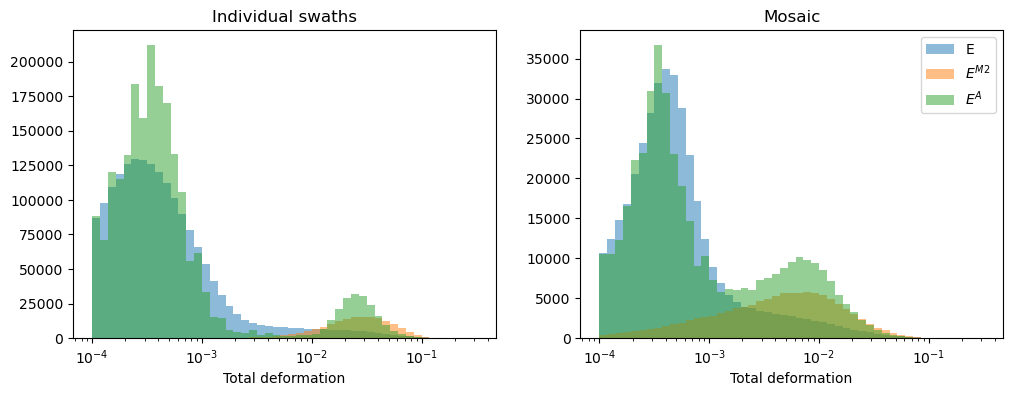

In [4]:
bins = np.logspace(*clim, n)
fig, axs = plt.subplots(1,2, figsize=(12,4))
for i in range(3):
    tot_raw = exp_raw['exp_00'][i]
    tot_pro = exp_pro['exp_00'][i]
    
    axs[0].hist(tot_raw[tot_raw > cmin], bins, alpha=0.5, label=labels[i])
    axs[1].hist(tot_pro[tot_pro > cmin], bins, alpha=0.5, label=labels[i])

axs[0].set_title('Individual swaths')
axs[1].set_title('Mosaic')
for ax in axs:
    ax.set_xscale('log')
    ax.set_xlabel('Total deformation')

plt.legend()
plt.show()

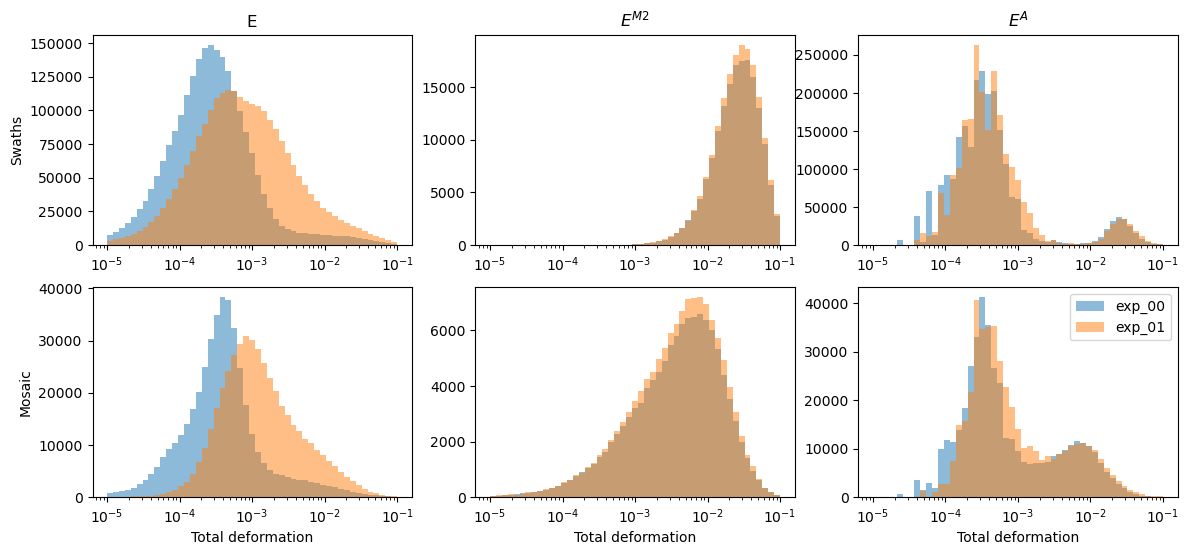

In [5]:
clim = [-5, -1]
bins = np.logspace(*clim, n)

fig, axs = plt.subplots(2,3, figsize=(14,6))
for iexp, exp in enumerate(exps):
    for i in range(3):
        defor = exp_raw[exp][i]
        axs[0,i].hist(defor[defor > 0], bins, alpha=0.5, label=exp)
        defor = exp_pro[exp][i]
        axs[1,i].hist(defor[defor > 0], bins, alpha=0.5, label=exp)

for i in range(3):
    axs[0,i].set_title(labels[i])

axs[0,0].set_ylabel('Swaths')
axs[1,0].set_ylabel('Mosaic')

for ax in axs.flat:
    ax.set_xscale('log')

for ax in axs[1]:
    ax.set_xlabel('Total deformation')

plt.legend()
plt.show()
    